In [1]:
import numpy as np
import pandas as pd
import pyclustering as pycl
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pyclustering.utils import timedcall
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import draw_clusters

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribite to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

**Significance level of Dimention after PCA**

In [9]:
print(pca.explained_variance_ratio_)

[0.92264045 0.04810411 0.01829962]


In [10]:
sample = df_3d.tolist()

In [11]:
sample

[[-2.865506694179958, 0.30278044218553374, 0.048489721083217086],
 [-2.893213389873787, -0.1769871462954613, -0.1687981822398551],
 [-3.055749096836028, -0.16800628887325064, 0.056542414873649915],
 [-2.921249021305701, -0.325027211241508, 0.009800108102126281],
 [-2.9067514031274233, 0.30233272361440966, 0.1537203023359443],
 [-2.488999876224114, 0.7397271868671302, 0.20067923958637474],
 [-2.9910653468314603, -0.11673983401330118, 0.2503858210508844],
 [-2.811052907716941, 0.15563581438173663, 0.01662684891974331],
 [-3.0524803155815983, -0.5896875831557237, -0.009287332400670034],
 [-2.8547014770343715, -0.1116332941872416, -0.1649558575723123],
 [-2.7008567941281805, 0.6362988400049816, 0.023453589737360614],
 [-2.7978438302013893, 0.008043468006814547, 0.08999455800899708],
 [-2.9603402687059757, -0.2390253328621202, -0.16705986051968497],
 [-3.3675721647873043, -0.553686578694897, 0.09819630254772632],
 [-2.830799547741352, 1.1465907493216045, 0.07491863437912921],
 [-2.587967152

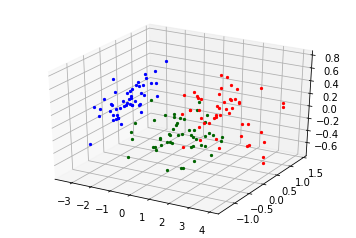

In [12]:
initial_centers = kmeans_plusplus_initializer(sample, 3).initialize()
initial_centers_list=[]
for center in initial_centers:
    initial_centers_list.append(center.tolist())
kmedians_instance = kmedians(sample,initial_centers_list)
(ticks, result) = timedcall(kmedians_instance.process)
clusters = kmedians_instance.get_clusters()
centers = kmedians_instance.get_medians()
draw_clusters(sample,clusters)

In [13]:
print('Execution Time: ',ticks,'Sec')

Execution Time:  0.006793999999999967 Sec


**initial centers given**

In [14]:
print(initial_centers_list)

[[3.227621317618276, 0.7267175069793083, -0.2540980520035981], [-3.1560049141636664, -0.3745803665889439, 0.18891313041960606], [1.3646925022707785, 0.6257966572696998, -0.48023291148093716]]


**Centroids of newly formed clusters**

In [15]:
centers

[[2.332944728040854, 0.0631510742607092, 0.26250682730956],
 [-2.813744394888923, 0.17126314208941493, 0.0525160679784335],
 [0.599133013879718, -0.25934665689216163, -0.24034789620628688]]

In [16]:
print('Number of clusters found :'+str(len(clusters)))

Number of clusters found :3


[50, 50, 50]


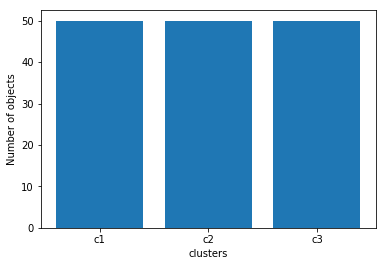

In [17]:
c=[]
for cluster in clusters:
    c.append(len(cluster))
print(c)
cluster_label=['c1','c2','c3']
plt.bar([1,2,3],height=c,tick_label=cluster_label)
plt.ylabel('Number of objects')
plt.xlabel('clusters')
plt.show()

In [18]:
sample1=pd.DataFrame(sample).values
centers_list=np.array(centers)
initial_centers_list1=np.array(initial_centers_list)

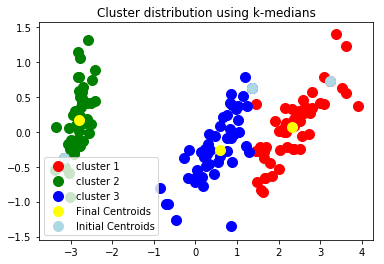

In [19]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],0],sample1[clusters[0],1],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],0],sample1[clusters[1],1],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],0],sample1[clusters[2],1],s=100,c='blue',label='cluster 3')

#plot centers of respective new clusters
plt.scatter(centers_list[:,0],centers_list[:,1],s=100,c='yellow',label='Final Centroids')

#plot initial centers assigned to clusters
plt.scatter(initial_centers_list1[:,0],initial_centers_list1[:,1],s=100,c='lightblue',label='Initial Centroids')


plt.title('Cluster distribution using k-medians')
plt.legend()